In [11]:
%load_ext autotime                              

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tkinter import Tk
from tkinter.filedialog import askdirectory
from os import listdir
from os.path import isfile, join

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 998 µs


In [12]:
# File dialog box
root = Tk()
root.withdraw()
path = askdirectory(title = "Select folder containing images in .npy format")
plane = path.split('/')[-1]

time: 1.68 s


In [13]:
image_paths = [k for k in [f for f in listdir(path) if isfile(join(path,f))] if 'npy' in k] # Inner nested list comp gives a list of files in the directory. Outer list comp determines if they are .npy files.

time: 71.3 ms


In [14]:
all_images = []
for i in range(len(image_paths)):
    all_images.append(np.load(path+"/"+image_paths[i]))

time: 1.54 s


MovieWriter ffmpeg unavailable; using Pillow instead.


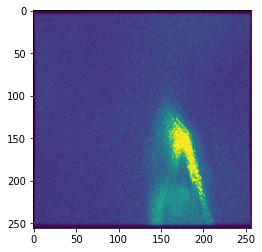

time: 2.54 s


In [27]:
im_select = 2  # Change this to adjust which image to display


fig = plt.figure()
list_figs = []

for i in range(np.shape(all_images[im_select])[0]):
    temp_fig = plt.imshow(all_images[im_select][i,:,:])
    list_figs.append([temp_fig])

ani = animation.ArtistAnimation(fig, list_figs, interval=100, blit=True, repeat_delay=1000)
save = ani.save(plane +'_'+ str(im_select-1).zfill(4)+'.gif')